# Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

# Monte Carlo Simulation of 2-D Ising Model

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from random import random, randrange

# Part A)

We can use Monte Carlo methods to simulate the ising model - a particularly simple model for magnets that considers dipole $\pm 1$ spins of atoms in a magnet. We restrict ourselves to a two-dimensional lattice where spins only interact with their adjacent atoms (quite a significant assumption!). We will model the ferromagnetic case, where the spins prefer to align themselves such that they minimize energy. The energy for such a system is given by:
\begin{equation*}
E = -J \sum_{\langle ij \rangle} s_i s_j
\end{equation*}
where $s= \pm 1$ indicated the spin, and $i,j$ are the atoms in the lattice. Below we define a function to calculate such an energy for a given lattice.

In [2]:
def energyfunction(dipoles):
    """ Function to calculate energy
    INPUTS: 2-dim numpy array of dipole spins (grid)
    OUTPUT: float of energy"""
    # do multiplication for both top and side
    # (bottom and other side are included in next particle's E)
    energy = - np.sum(dipoles[:,:-1]*dipoles[:,1:]) - \
               np.sum(dipoles[:-1,:]*dipoles[1:,:])    
    return energy

# Part B)

We now write a Metropolis-style simulation for the Ising model with $J=1$ and $k_BT=1$ in unites where $k_B=1$. We start with an array of randomly distributed spins, then pick one individual spin, flip it, and caluclate acceptance probabilty according to the formula $$ P_a = \begin{cases} 1 & \text{if} \;\; E_j \leq E_i \\ e^{- (E_j - E_i)/k_BT} & \text{if} \;\; E_j > E_i \end{cases}. $$ 
If the move is accepted, we repeat the process. If not we "un-flip" before also repeating the process with a new random spin.

In [3]:
def acceptance(En, Eo, kT):
    """ Function to determine acceptance or rejection
    INPUTS: En [float] the new energy, Eo [float] the old energy,
            kT [float] kB*T temperature
    OUTPUT: accepted [bool]
    """
    p = np.exp(-(En - Eo)/kT)  # Boltzmann factor
    if En-Eo <= 0 or random() < p: # accepted
        accepted = True 
    else:  # rejected
        accepted = False
    return accepted # return True (accepted) or False (rejected)

def M(dipoles): return np.sum(dipoles)  # sum total magnetization

# define constants
kB = 1.0 # Boltzman constant
Temp = 1.0 # Temperature
J = 1.0 # Constant
num_dipoles = 100 # Size of square grid
N = 1000000  # number of flips (Metropolis steps)

# generate initial random array of dipoles
initial = np.ones((num_dipoles,num_dipoles), int) - \
        2*np.random.randint(2,size=(num_dipoles, num_dipoles))

def ising(dipole_in,N,T,kB=1.0,J=1.0):
    ''' Function to do Monte Carlo simulation on 2d Ising Model
    INPUTS: dipole_in (initial array of dipole spins), N (number
            of steps), T (temeprature), kB (constant), J (constant)
    OUTPUTS: dipoles (final array of dipole spins), energy (array
            of energy at step), magnet (array of magnetizations at 
            each step)'''
    dipoles = np.copy(dipole_in)
    energy = np.empty(N+1) # array to store energies at each step
    magnet = np.empty(N+1) # array to store magnetization at each step

    # store initial energy and magnetization to arrays
    E = J*energyfunction(dipoles)
    energy[0] = E
    magnet[0] = M(dipoles)

    for i in range(N):
        # pick a random dipole in grid
        picked = (randrange(num_dipoles),randrange(num_dipoles))
        dipoles[picked] *= -1  # flip the spin
        Enew = J*energyfunction(dipoles) # calculate the new energy

        # calculate new energy depending on probability
        flipd = acceptance(Enew, E, kB*T)  # this is the next old value
        if flipd:
            E = Enew
        else:
            dipoles[picked] *= -1  # we de-flip

        # store energy and magnetization
        energy[i+1] = E
        magnet[i+1] = M(dipoles)
    return dipoles, energy, magnet

dip_1, ene_1, mag_1 = ising(initial,N,Temp)

# Part C)

Now we plot our code from part (B). We plot the total magnetization as calculated by $\texttt{M}$ as a function of steps in the Monte Carlo simulation. Along with it we also plot the total energy at each step.

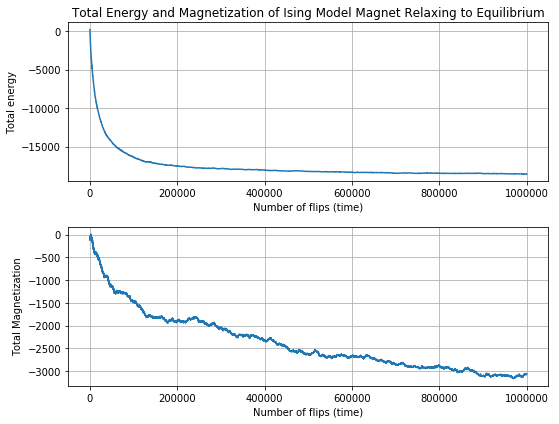

In [4]:
# plot energy, magnetization
plt.figure(figsize=(8,6))

plt.subplot(211)
plt.title('Total Energy and Magnetization of Ising Model Magnet Relaxing to Equilibrium')
plt.plot(ene_1)
plt.grid()
plt.xlabel("Number of flips (time)")
plt.ylabel("Total energy")

plt.subplot(212)
plt.plot(mag_1)
plt.grid()
plt.xlabel("Number of flips (time)")
plt.ylabel("Total Magnetization")

plt.tight_layout()
plt.show()

# Part D)

As the state reaches a thermal equilibrium, it goes from having high energy and little magnetization to low energy and high magnetization due to the alignment of the spins. The actual sign of the magnetization however (be it very positive or very negative) depends on the individual run. This 'randomness' is because dipoles do not have an intrinsic preference to be either up or down; as long as they are all aligned, the energy will be a minimum. The final equilibrium therefore is entirely dependent on the direction that the initial walk takes. When we create our initial state with random spins, if it is created with slightly more $+1$ spins than $-1$ spins then it is very likely that the Metropolis walk will take it to a final magnetization that minimizes energy by preferentially flipping $-1$ spins to $+1$. We therefore find that while the magnitude of final magnetization remains (relatively) the same between runs, the sign can differ based random variations in our starting states.

We encourage the reader to run our code several times and confirm the above for themselves.

# Part E)

In this final section, we will repeat the above for 2 more temperatures $T=2$ and $T=3$ using the same initial spin state. When finished, we will plot all 3 runs visually, showing their final spin distributions. We will comment on the differences between the various temepratures.

T=1: Final Energy =  -18568
T=1: Final Magnetization =  -3062
T=2: Final Energy =  -15580
T=2: Final Magnetization =  1270
T=3: Final Energy =  -8038
T=3: Final Magnetization =  -200


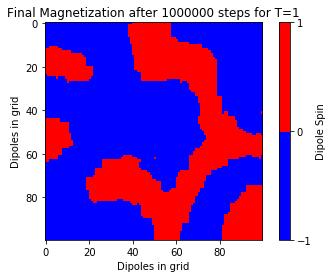

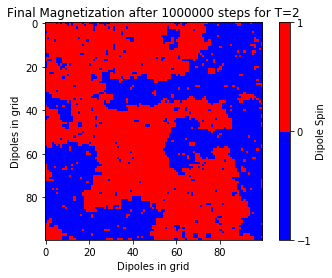

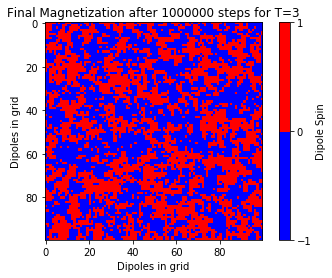

In [6]:
# we already have calculation for T=1. Now get T=2,3
dip_2, ene_2, mag_2 = ising(initial,N,2.0)
dip_3, ene_3, mag_3 = ising(initial,N,3.0)

plt.figure(1)
plt.imshow(dip_1, cmap=plt.cm.get_cmap('bwr', 2))
plt.colorbar(ticks=(-1,0,1), label='Dipole Spin')
plt.title('Final Magnetization after {0} steps for T=1'.format(N))
plt.xlabel('Dipoles in grid')
plt.ylabel('Dipoles in grid')
print('T=1: Final Energy = ', int(ene_1[-1]))
print('T=1: Final Magnetization = ', int(mag_1[-1]))

plt.figure(2)
plt.imshow(dip_2, cmap=plt.cm.get_cmap('bwr', 2))
plt.colorbar(ticks=(-1,0,1), label='Dipole Spin')
plt.title('Final Magnetization after {0} steps for T=2'.format(N))
plt.xlabel('Dipoles in grid')
plt.ylabel('Dipoles in grid')
print('T=2: Final Energy = ', int(ene_2[-1]))
print('T=2: Final Magnetization = ', int(mag_2[-1]))

plt.figure(3)
plt.imshow(dip_3, cmap=plt.cm.get_cmap('bwr', 2))
plt.colorbar(ticks=(-1,0,1), label='Dipole Spin')
plt.title('Final Magnetization after {0} steps for T=3'.format(N))
plt.xlabel('Dipoles in grid')
plt.ylabel('Dipoles in grid')
print('T=3: Final Energy = ', int(ene_3[-1]))
print('T=3: Final Magnetization = ', int(mag_3[-1]))
plt.show()

We see that at higher temperatures, the dipoles are less ordered. This is exactly what we would expect from theory. Intuitively, when the temperature is increased the dipoles have more energy and so are more able to stay in higher energy spin states. The result is a more randomly oriented, higher energy, and less magnetized system. From a simulation perspective, a higher temperature means a smaller exponent in the exponential term of the probability acceptance. An exponential to a smaller negative number is a larger number overall, meaning that the dipole has a higher probability of accepting a flip on each step of the Metropolis algorithm walk!

The cunclusion therefore is that as temperature is increased, the magnet becomes more disordered, equilibrating at a higher energy with lower total magnetization.